# Predicting heart diseases based on various factors and determining the most important factor in predicting if heart disease will occur

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as plot
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import sklearn
import io
import plotly.express as px
from IPython.display import display

In [19]:
!pip install -U kaleido

### Data Preparation And Cleaning

In [20]:
#uploaded = files.upload()

In [21]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Upon initial exploration of the dataset, we see that there are 303 rows of data and and 14 columns of data. Out of the 14 columns, there are 13 variables that include numeric and categorical variables that have an effect on the chance heart disease.The presence of heart diseases or not is in the "target" column.

## Explaining the variables in the dataset
### Age: The age of the person

### Sex: Gender of the person
0: Male

1: Female

### Cp: Chest pain types
0: asymptomatic

1: atypical angina

2: non-anginal pain

3: typical angina

### Trestbps: Resting blood pressure levels in mm Hg 

### Chol: Cholestrol level in mg/dl

### Fbs: Fasting blood sugar > 120 mg/dl 
0 = false

1 = true

### Restecg: Resting electrocardiographic results 
0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

1: normal

2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

### thalach: Maximum heart rate achieved

### exang: Exercise induced angina 
0 = no

1 = yes

### oldpeak: ST depression induced by exercise relative to rest.‘ST’ relates to positions on the ECG plot.

### slope: The slope of the peak exercise ST segment 
0: downsloping

1: flat

2: upsloping

### ca: number of major vessels (0-4) 

### thal: A blood disorder called thalassemia

1: fixed defect (no blood flow in some part of the heart)

2: normal blood flow

3: reversible defect (a blood flow is observed but it is not normal)

### Target: Target column 
0 = No

1 = Yes

In [22]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Null values will distort the accuracy of our data. Upon exploration, we realize that the data set has no null values, hence we do not need to populate any null values.

---



In [24]:
data.groupby('target').size()

target
0    138
1    165
dtype: int64

There are 165 occurences of heart disease occuring and 138 occurence of heart disease not occuring in this dataset out of 303 data points 

In [25]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploring the basic stastics of our dataset. It is important to note that since the target column is the one we are trying to predict, the statistics from the target column is not applicable to our analysis.

### Exploratory Data Analysis

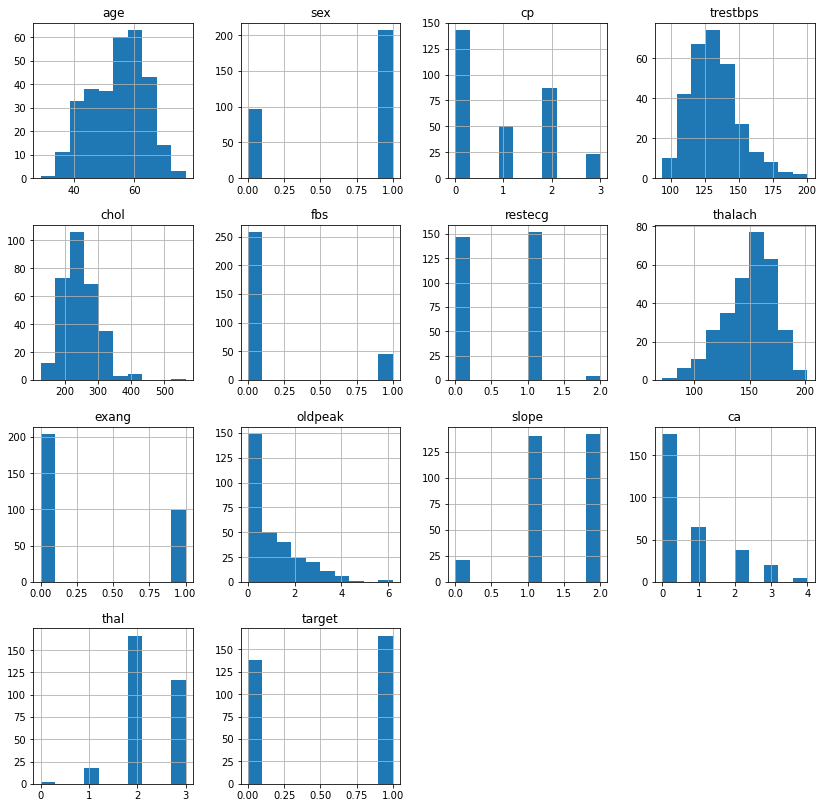

In [26]:
data.hist(figsize=(14,14))
plt.show()

### Exploring the frequency of each variable in the data set using a histogram, we deduced that 

Age: The maximum number of people in the dataset are of the age of 60

Sex: The number of females are almost twice the number of males in the dataset

cp: Chest pain type 0 has the highest frequency in the dataset

Trestbps: Most number of people have a resting blood pressure between 125-137

Chol: Most number of people have a cholestrol level between 225-250

fbs: There are more occurence of 0 (blood sugar levels <120) than 1 (blood sugar>= 120)

restecg: The number of occurence of levels 0 and 1 are similar, 2 has the least occurence of the type of restecg

thalach: Most number of people have a maximum heart rate achieved of 150-160

exang: The frequency of the number of people without Exercise induced angina is greater than the number of people with Exercise induced angina

oldpeak: The highest frequency of oldpeak level is 0

slope: The levels of 1 and 2 have similar frequencies whilst 0 has the lowest frequency

ca: Level 0 has the highest occurence followed by 1, 2, 3 then 4

thal: The highest frequency is at level 2, followed by 3, 1 and 0 

Target: In our dataset, the frequency of having heart disease is greater than the frequency of not having heart disease|


In [34]:
temp=data[['oldpeak','trestbps','age','chol','thalach']]
fig = make_subplots(rows=5)

# Add the box plots to the subplots
fig.add_trace(px.box(data_frame=temp, x='oldpeak').data[0], row=1, col=1)
fig.add_trace(px.box(data_frame=temp, x='trestbps').data[0], row=2, col=1)
fig.add_trace(px.box(data_frame=temp, x='age').data[0], row=3, col=1)
fig.add_trace(px.box(data_frame=temp, x='chol').data[0], row=4, col=1)
fig.add_trace(px.box(data_frame=temp, x='thalach').data[0], row=5, col=1)

# Update the layout and axes labels
fig.update_layout(title='Box Plots of Various Features:',height=900, width=900)

fig.update_yaxes(title_text='Oldpeak (mm)', row=1, col=1)
fig.update_yaxes(title_text='Trestbps (mmHg)', row=2, col=1)
fig.update_yaxes(title_text='Age (years)', row=3, col=1)
fig.update_yaxes(title_text='Chol (mg/dl)', row=4, col=1)
fig.update_yaxes(title_text='Thalach (bpm)', row=5, col=1)

# Show the plot
display(fig)

### Analysis for the Above Box Plots
Plotting the boxplots for the numeric variables using plotly (something new that we learnt) shows us the quartiles,minimum, maximum, median, upper & lower bound and outliers present in the dataset. The outliers have the ability to skew the data which can affect the accuracy of our prediction. Hence, we dropped the outliers in our data to ensure accurate predictions.

### Removal Of Outliers

In [10]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [11]:
newdata = remove_outlier(data, 'oldpeak')
newdata1 = remove_outlier(newdata, 'chol')
newdata2 = remove_outlier(newdata1,'age')
newdata3 = remove_outlier(newdata2,'trestbps')
finaldata = remove_outlier(newdata3,'thalach')
finaldata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 24 Rows of data that contain the outliers were removed from the dataset. Below are the boxplots of the continuous variables with the outliers removed

In [35]:
temp= finaldata[['oldpeak','trestbps','age','chol','thalach']]
fig = make_subplots(rows=5)

# Add the box plots to the subplots
fig.add_trace(px.box(data_frame=temp, x='oldpeak').data[0], row=1, col=1)
fig.add_trace(px.box(data_frame=temp, x='trestbps').data[0], row=2, col=1)
fig.add_trace(px.box(data_frame=temp, x='age').data[0], row=3, col=1)
fig.add_trace(px.box(data_frame=temp, x='chol').data[0], row=4, col=1)
fig.add_trace(px.box(data_frame=temp, x='thalach').data[0], row=5, col=1)

# Update the layout and axes labels
fig.update_layout(title='Box Plots of Various Features:',height=900, width=900)

fig.update_yaxes(title_text='Oldpeak (mm)', row=1, col=1)
fig.update_yaxes(title_text='Trestbps (mmHg)', row=2, col=1)
fig.update_yaxes(title_text='Age (years)', row=3, col=1)
fig.update_yaxes(title_text='Chol (mg/dl)', row=4, col=1)
fig.update_yaxes(title_text='Thalach (bpm)', row=5, col=1)

# Show the plot
display(fig)

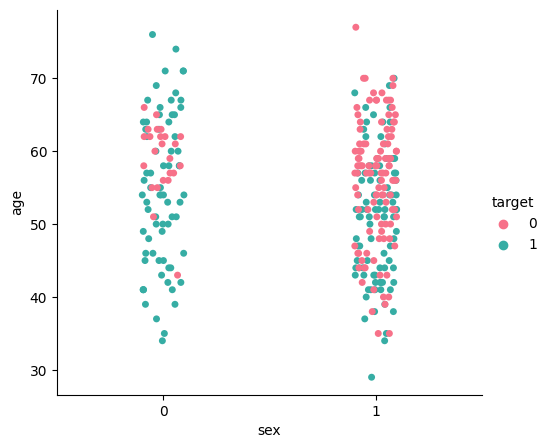

In [305]:
sns.catplot(data=data, x='sex', y='age',  hue='target', palette='husl')
plt.subplots_adjust(bottom=0.2) 

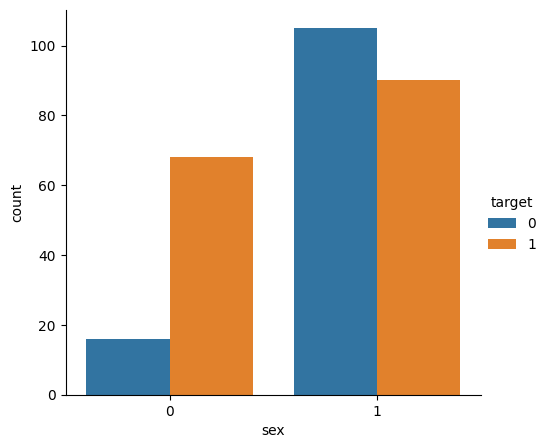

In [306]:
sns.catplot(x='sex', hue='target', kind='count', data=finaldata)
plt.subplots_adjust(bottom=0.2) 

In [307]:
finaldata.groupby('sex').size()

sex
0     84
1    195
dtype: int64

## Analysis:
From the 2 plots,that males (0) are more susceptible to heart diseases than females (1) as there are alot more green plots than red plots for males compared to females. However there are more than twice the number of females compared to males which causes the total count for females having heart disease to be greater than males.

In [308]:
finaldata.groupby('cp').size()

cp
0    127
1     49
2     83
3     20
dtype: int64

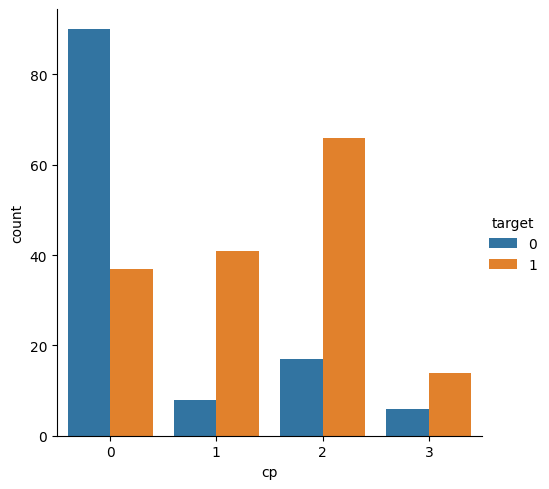

In [309]:
sns.catplot(x='cp', hue='target', kind='count', data=finaldata)

## Analysis:
The plot shows that people with chest pain of type 0 have the highest chance of not having a heart disease. People with chest pain types 1,2,3 have a greater chance of having heart diseases compared to not having heart disease. This makes chest pain a type an important variable for our prediction.

In [310]:
finaldata.groupby('fbs').size()

fbs
0    240
1     39
dtype: int64

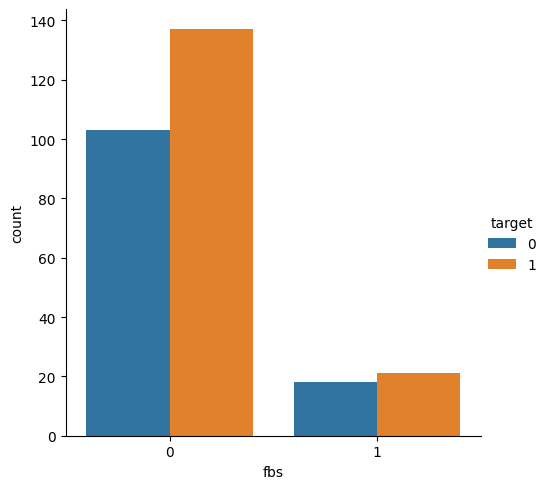

In [311]:
sns.catplot(x='fbs', hue='target', kind='count', data=finaldata)

## Analysis:
Plotting fbs (fasting blood suger) against the target variable of having heart disease of not, we can see that when fbs<120 (0) the chance of having a heart disease is greater than not having heart disease. When fbs>120(1), the chance of having heart disease to not having is almost the same. Hence fbs will be an important variable in our prediction.

<Axes: xlabel='target', ylabel='age'>

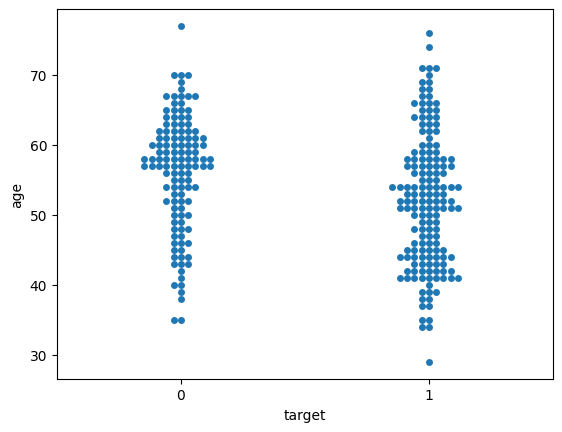

In [312]:
sns.swarmplot(x="target", y="age", data=finaldata,)

## Analysis:
Based on the swarmplot, there doesn't seem to be a relation between age and having heart disease or not as people of every age group seem to have or not have heart diseases and we cannot cut the swarmplot based on a certain threshold to predict if beyond a certain age, a person will definitely have a heart disease or not.

Text(0.5, 1.0, 'Age of patients with heart disease')

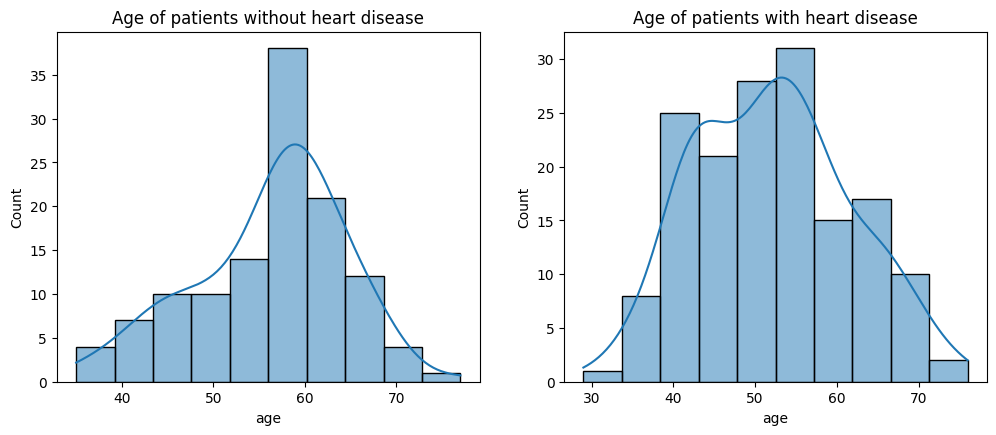

In [313]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(finaldata[finaldata['target']==0].age, kde = True)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.histplot(finaldata[finaldata['target']==1].age, kde = True)
plt.title('Age of patients with heart disease')

### Analysis
Based on the Kernel Density Estimate above, it can be seen that the highest frequency of the number of patients without heart diseases lies just below the age of 60 whilst the highest frequency of the age of patients with heart diseases lies at the age of 55.

<Axes: xlabel='target', ylabel='chol'>

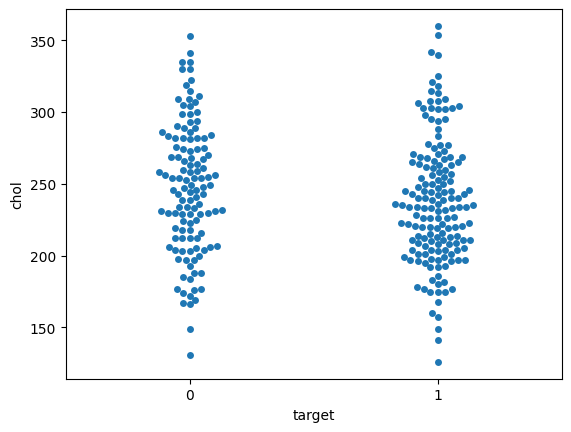

In [314]:
sns.swarmplot(x="target", y="chol", data=finaldata)

## Analysis:
Based on the swarmplot, there doesn't seem to be a clear relation between cholestrol level and having heart disease or not as people at every cholestrol level seem to have or not have heart diseasesand we cannot cut the swarmplot based on a certain threshold to predict if beyond a cholestrol level, a person will definitely have a heart disease or not.

<Axes: xlabel='target', ylabel='trestbps'>

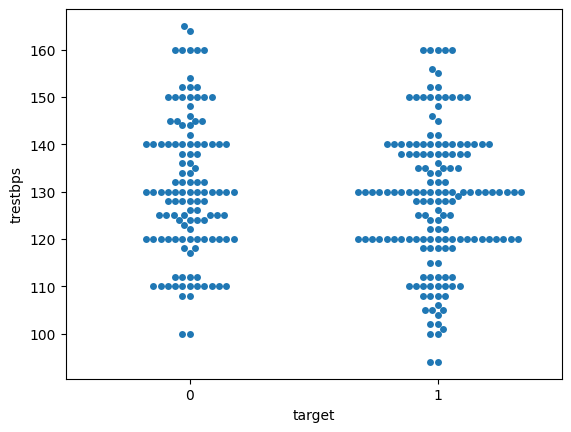

In [315]:
sns.swarmplot(x="target", y="trestbps", data=finaldata)

## Analysis:
Based on the swarmplot, there doesn't seem to be a clear relation between trestbps level and having heart disease or not as people at every trestbps level seem to have or not have heart diseases and we cannot cut the swarmplot based on a certain threshold to predict if beyond a trestbps value, a person will definitely have a heart disease or not.

<Axes: xlabel='target', ylabel='thalach'>

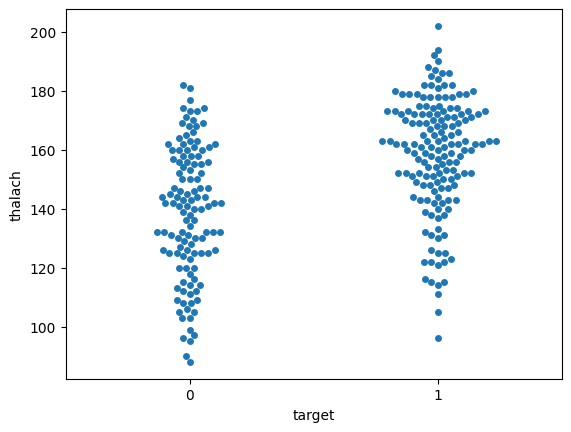

In [316]:
sns.swarmplot(x="target", y="thalach", data=finaldata)

## Analysis:
Based on the swarmplot, there seems to be a relationship between thalach and having heart disease. Below the thalach level of 140, there is a greater likelyhood that one will not have the heart disease compared to having the disease. Hence thalach will be an important variable for our prediction.

Text(0.5, 1.0, 'Max heart rate of patients without heart disease')

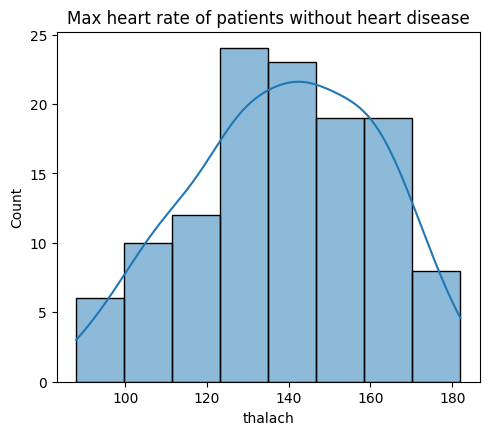

In [317]:
plt.figure(figsize=(12,10))
plt.subplot(223)
sns.histplot(finaldata[finaldata['target']==0].thalach, kde = True )
plt.title('Max heart rate of patients without heart disease')

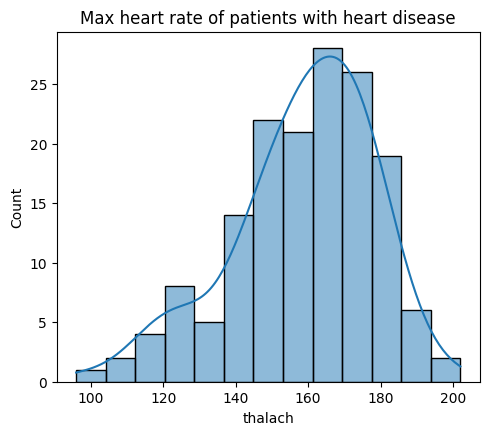

In [318]:
plt.figure(figsize=(12,10))
plt.subplot(224)
sns.histplot(finaldata[finaldata['target']==1].thalach, kde = True )
plt.title('Max heart rate of patients with heart disease')
plt.show()

### Analysis
Based on the 2 Kernel Density Estimates above, the highest frequency of the maximum heart rate of patients (thalach) that have heart diseases is 165 and is higher than the highest frequency of the maximum heart rate of patients who do not have heart diseases which is about 125, hence we can deduce that thalach (maximum heart rate) will be an important variable for our prediction

<Axes: xlabel='target', ylabel='oldpeak'>

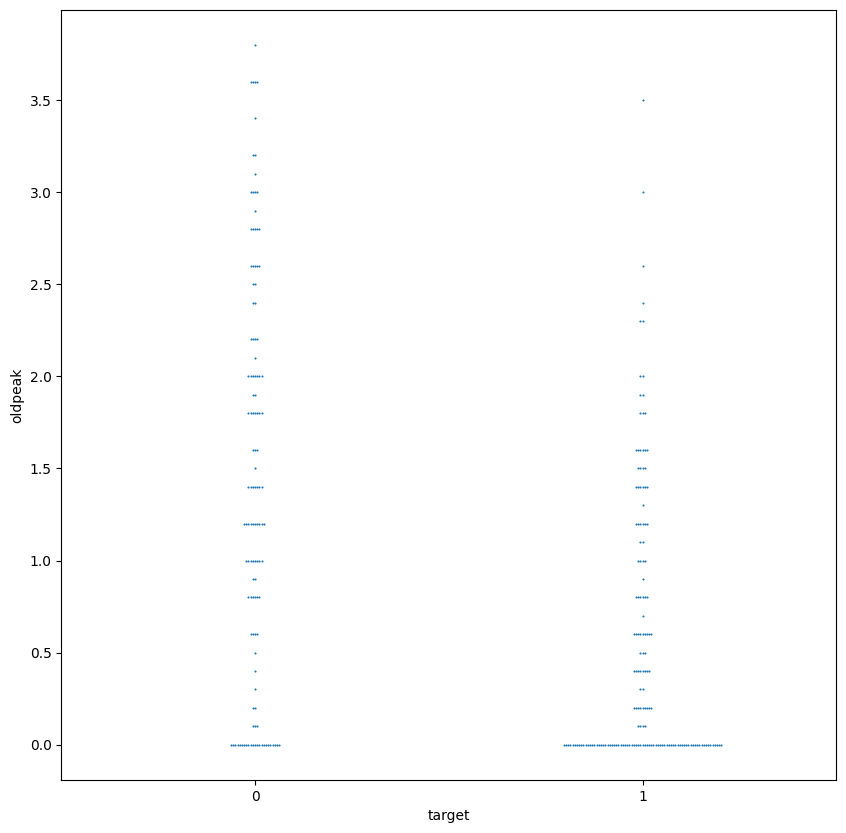

In [319]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="target", y="oldpeak", data=finaldata, size=1.5)

## Analysis:
Based on the swarmplot, there seems to be a clearer relationship between oldpeak and having heart disease. Above the oldpeak level of 2, there is a greater likelyhood that one will not have the heart disease compared to having the disease. Hence oldpeak will be an important variable in predicting heart disease.

In [320]:
finaldata.groupby('ca').size()

ca
0    162
1     63
2     33
3     16
4      5
dtype: int64

<Axes: xlabel='ca', ylabel='count'>

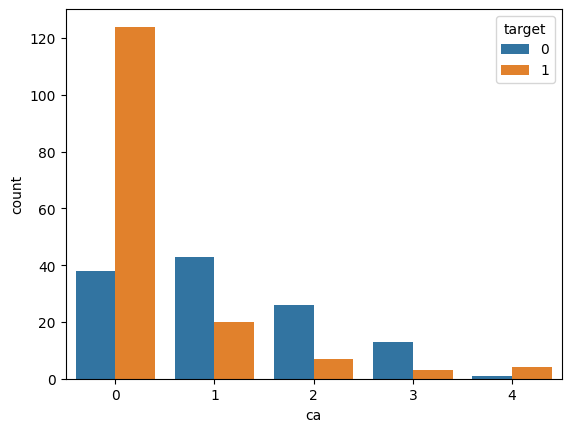

In [321]:
sns.countplot(x='ca',hue='target',data=finaldata)

## Analysis:
The barplots show that when ca is 0 and 4, the chances of having heart diseases is greater than the chance of not having a heart disease. But when the ca is 1,2 or 3, the chance of not having a heart disease is greater than the chance of having a heart disease. Hence ca should be an important variable in predicting heart disease. 

In [322]:
finaldata.groupby('thal').size()

thal
0      2
1     16
2    160
3    101
dtype: int64

<Axes: xlabel='thal', ylabel='count'>

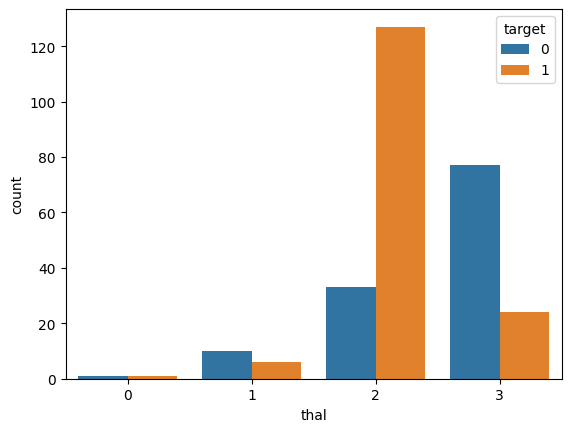

In [323]:
sns.countplot(x='thal', data=finaldata, hue='target')

## Analysis:
The barplots show that when thal value is 2, chance of having heart disease is higher but when thal value is 1 or 3, chance of not having heart disease is higher. Hence thal will be an important variable in predicting heart diseases.

In [324]:
finaldata.groupby('restecg').size()

restecg
0    132
1    145
2      2
dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

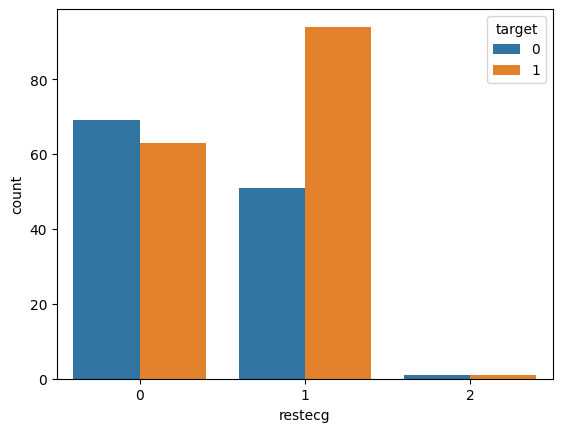

In [325]:
sns.countplot(x='restecg', data=finaldata, hue='target')

## Analysis:
The barplots show that when restecg value is 1 chance of having heart disease is higher but when restecg value is 0, chance of not having heart disease is higher. Hence restecg will be an important variable for predicting heart disease.

In [326]:
finaldata.groupby('exang').size()

exang
0    192
1     87
dtype: int64

<Axes: xlabel='exang', ylabel='count'>

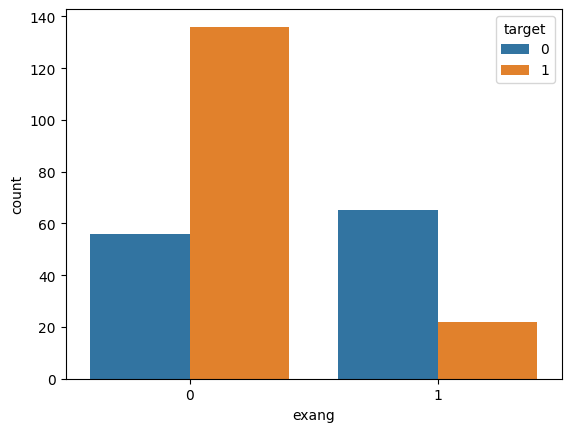

In [327]:
sns.countplot(x='exang', data=finaldata, hue='target')

## Analysis:
The barplots show that when exang value is 0 chance of having heart disease is higher but when restecg value is 1, chance of not having heart disease is higher. Hence exang will be an important variable for our prediction.

In [328]:
finaldata.groupby('slope').size()

slope
0     15
1    127
2    137
dtype: int64

<Axes: xlabel='slope', ylabel='count'>

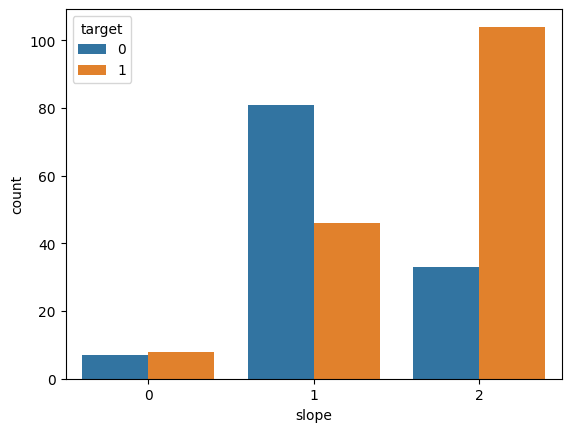

In [329]:
sns.countplot(x='slope', data=finaldata, hue='target')

## Analysis:
The barplots show that when slope value is 0 and 2, the chance of having heart disease is higher but when slope value is 1, chance of not having heart disease is higher. Hence slope will be an important variable for our prediction.


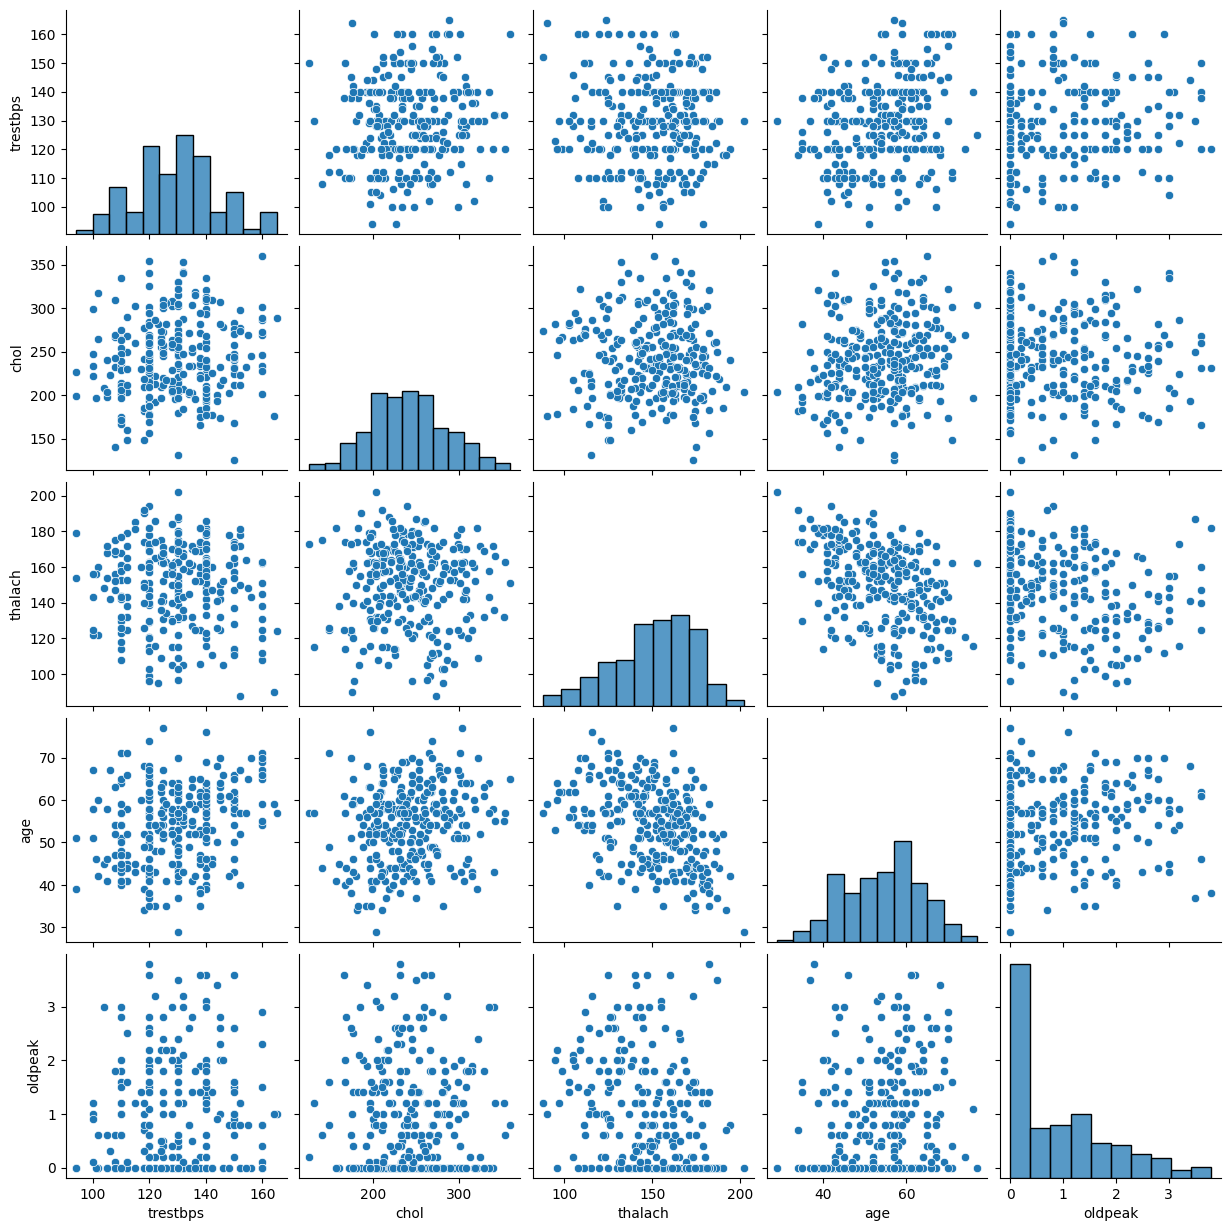

In [330]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

sns.pairplot(finaldata[numeric_columns])

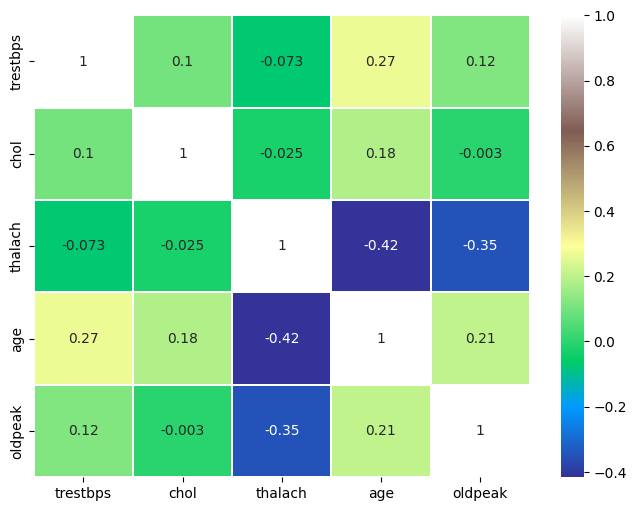

In [331]:
sns.heatmap(finaldata[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

We plot a multi variate pairplot of the continous variables to analyse if there is a correlation between any of the continuous variables. Based on the pairplot and the correlation matrix, we can conclude that there is no strong correlation between any of the numeric variables

Based on our exploratory data analysis that we conducted to analyze if there is a relationship between any of the variables and chance of having heart disease, we deduced that categorical variables (represented by countplots) have a more significant relationship with heart disease rate compared to the continous numerical variables (represented by swarmplots). Hence the categorical variables may be more important in predicting the chance of heart diseases compared to the numerical variables. 

# Machine Learning Models

### Decision Tree Classifier

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
finaldata[columns_to_scale] = StandardScaler.fit_transform(finaldata[columns_to_scale])
finaldata

/var/folders/1g/75xw4_yd4y93hrkvk96kpybr0000gn/T/ipykernel_54944/1730133101.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.994256,1,3,1.068702,-0.200262,1,0,-0.002825,0,1.375268,0,0,1,1
1,-1.838554,1,2,0.047579,0.181201,0,1,1.617529,0,2.576519,0,0,2,1
2,-1.402737,0,1,0.047579,-0.850993,0,0,0.960628,0,0.474329,2,0,2,1
3,0.231577,1,1,-0.633170,-0.132945,0,1,1.223388,0,-0.126296,2,0,2,1
4,0.340531,0,0,-0.633170,2.514857,0,1,0.566488,1,-0.326505,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.340531,0,0,0.728328,-0.020750,0,1,-1.185246,1,-0.726922,1,0,3,0
299,-0.966920,1,3,-1.313918,0.495347,0,1,-0.791106,0,0.274121,1,0,3,0
300,1.539027,1,0,1.000628,-1.097822,1,1,-0.396966,0,2.476415,1,2,3,0
301,0.340531,1,0,0.047579,-2.489040,0,1,-1.535593,1,0.274121,1,1,3,0


We need to scale the continuous variables in our data first to ensure that variables with larger numerical values don't dominate the model and have a disproportionate influence on the outcome.